# IMPORTS

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller


In [2]:
titulos = pd.read_csv('../Datasets/Complete Dataset.csv')
titulos['data_base'] = pd.to_datetime(titulos.data_base)
titulos.set_index('data_base', inplace=True)
titulos

,titulo,taxa_compra,selic,cdi,cambio,treasuries,ipca
data_base,,,,,,,
2004-12-31,Tesouro IGPM+ com Juros Semestrais 01/07/2017,8.26,17.75,17.76,2.6536,4.24,0.86
2004-12-31,Tesouro IGPM+ com Juros Semestrais 01/04/2008,8.72,17.75,17.76,2.6536,4.24,0.86
2004-12-31,Tesouro Prefixado com Juros Semestrais 01/01/2008,17.14,17.75,17.76,2.6536,4.24,0.86
2004-12-31,Tesouro IGPM+ com Juros Semestrais 01/12/2006,8.97,17.75,17.76,2.6536,4.24,0.86
2004-12-31,Tesouro IGPM+ com Juros Semestrais 01/03/2011,8.33,17.75,17.76,2.6536,4.24,0.86
...,...,...,...,...,...,...,...
2021-01-14,Tesouro IGPM+ com Juros Semestrais 01/01/2031,3.41,1.90,1.90,5.2611,1.15,0.25
2021-01-14,Tesouro IGPM+ com Juros Semestrais 01/04/2021,0.55,1.90,1.90,5.2611,1.15,0.25
2021-01-14,Tesouro IPCA+ 15/05/2035,3.58,1.90,1.90,5.2611,1.15,0.25


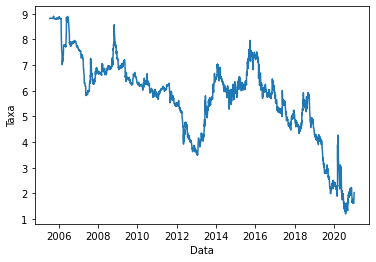

,taxa_compra,selic,cdi,cambio,treasuries,ipca
data_base,,,,,,
2005-07-18,8.81,19.72,19.70,2.3296,4.22,0.25
2005-07-19,8.81,19.72,19.70,2.3426,4.20,0.25
2005-07-20,8.82,19.72,19.69,2.3514,4.17,0.25
2005-07-21,8.82,19.72,19.69,2.3397,4.28,0.25
2005-07-22,8.82,19.72,19.69,2.3753,4.23,0.25
...,...,...,...,...,...,...
2021-01-08,1.75,1.90,1.90,5.3677,1.13,0.25
2021-01-11,1.86,1.90,1.90,5.4960,1.15,0.25
2021-01-12,2.01,1.90,1.90,5.4631,1.15,0.25


In [3]:
IPCA_2024 = titulos[titulos['titulo']=='Tesouro IPCA+ 15/08/2024']
IPCA_2024 = IPCA_2024.drop(columns=['titulo'])

plt.plot(IPCA_2024['taxa_compra'])
plt.xlabel('Data',fontsize=10)
plt.ylabel('Taxa',fontsize=10)
plt.show()

IPCA_2024

# DECOMPOSITION

Text(0, 0.5, 'Sazonalidade')

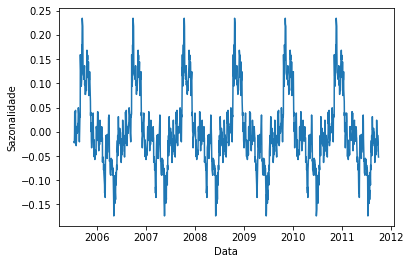

In [4]:
result = seasonal_decompose(IPCA_2024['taxa_compra'], period=250)
plt.plot(result.seasonal[:1500])
plt.xlabel('Data',fontsize=10)
plt.ylabel('Sazonalidade',fontsize=10)

In [5]:
IPCA_2024[:1500]

,taxa_compra,selic,cdi,cambio,treasuries,ipca
data_base,,,,,,
2005-07-18,8.81,19.72,19.70,2.3296,4.22,0.25
2005-07-19,8.81,19.72,19.70,2.3426,4.20,0.25
2005-07-20,8.82,19.72,19.69,2.3514,4.17,0.25
2005-07-21,8.82,19.72,19.69,2.3397,4.28,0.25
2005-07-22,8.82,19.72,19.69,2.3753,4.23,0.25
...,...,...,...,...,...,...
2011-09-26,5.98,11.90,11.88,1.8437,1.91,0.53
2011-09-27,5.94,11.90,11.88,1.8000,2.00,0.53
2011-09-28,5.95,11.90,11.88,1.8123,2.03,0.53


# CORRELATION MATRIX

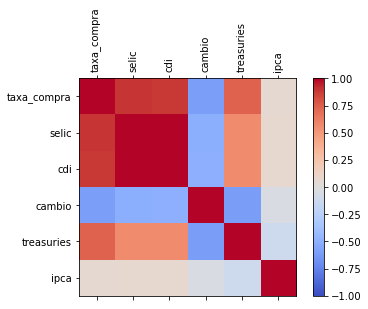

,taxa_compra,selic,cdi,cambio,treasuries,ipca
taxa_compra,1.000000,0.890783,0.889616,-0.599737,0.735966,0.065473
selic,0.890783,1.000000,0.999886,-0.500567,0.563507,0.077140
cdi,0.889616,0.999886,1.000000,-0.494773,0.562539,0.076323
cambio,-0.599737,-0.500567,-0.494773,1.000000,-0.605951,-0.033373
treasuries,0.735966,0.563507,0.562539,-0.605951,1.000000,-0.109559
ipca,0.065473,0.077140,0.076323,-0.033373,-0.109559,1.000000


In [6]:
corr = IPCA_2024.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(IPCA_2024.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(IPCA_2024.columns)
ax.set_yticklabels(IPCA_2024.columns)
plt.show()

corr

# AUTOCORRELATION

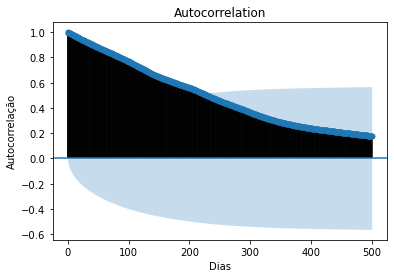

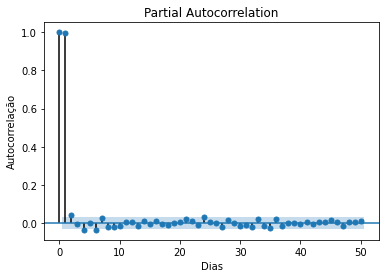

In [7]:
plot_acf(IPCA_2024['taxa_compra'], lags=500)
plt.xlabel('Dias',fontsize=10)
plt.ylabel('Autocorrelação',fontsize=10)
plt.show()

plot_pacf(IPCA_2024['taxa_compra'], lags=50)
plt.xlabel('Dias',fontsize=10)
plt.ylabel('Autocorrelação',fontsize=10)
plt.show()

# Checking for Stationarity

In [8]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    #Perform ADFuller to test for Stationarity of given series and print report
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [9]:
# ADF Test on each column
for name, column in IPCA_2024.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "taxa_compra" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1366
 No. Lags Chosen       = 27
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.7003. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "selic" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4458
 No. Lags Chosen       = 29
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.5601. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "cdi" 
    -----------------------------------------------
 Null Hypothesis: Data ha

# Making the series stationary

In [10]:
# 1st difference
df_differenced = IPCA_2024[['taxa_compra', 'selic', 'cdi', 'cambio', 'treasuries']].diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "taxa_compra" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4245
 No. Lags Chosen       = 30
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "selic" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0976
 No. Lags Chosen       = 30
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "cdi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

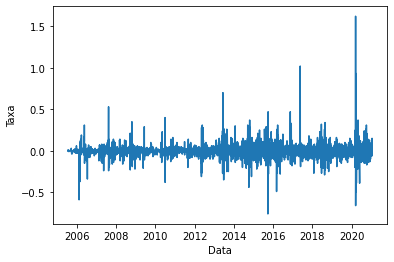

,taxa_compra,selic,cdi,cambio,treasuries,ipca
data_base,,,,,,
2005-07-19,0.00,0.0,0.00,0.0130,-0.02,0.25
2005-07-20,0.01,0.0,-0.01,0.0088,-0.03,0.25
2005-07-21,0.00,0.0,0.00,-0.0117,0.11,0.25
2005-07-22,0.00,0.0,0.00,0.0356,-0.05,0.25
2005-07-25,0.00,0.0,0.00,0.0526,0.02,0.25
...,...,...,...,...,...,...
2021-01-08,0.02,0.0,0.00,0.0250,0.05,0.25
2021-01-11,0.11,0.0,0.00,0.1283,0.02,0.25
2021-01-12,0.15,0.0,0.00,-0.0329,0.00,0.25


In [11]:
df_differenced['ipca'] = IPCA_2024['ipca']

plt.plot(df_differenced['taxa_compra'])
plt.xlabel('Data',fontsize=10)
plt.ylabel('Taxa',fontsize=10)
plt.show()

df_differenced